haha
8792
8792


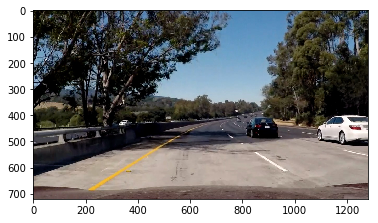

In [2]:
import glob 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np


smallset_car= glob.glob('./vehicles_smallset/cars*/*jpeg')
smallset_not_car = glob.glob('./non-vehicles_smallset/notcars*/*.jpeg')
test_img_fnames = glob.glob('./test_images/test*.jpg')
vehicle_datas = glob.glob('./vehicles-datas/*/*')
non_vehicle_datas = glob.glob('./non-vehicles-datas/*/*')

#read in file function 
def read_file(fnames):
    pics =[]
    for fname in fnames:
        pic = mpimg.imread(fname)
        pics.append(pic)
    return np.array(pics)

print('haha')
car_imgs = read_file(smallset_car)
notcar_imgs = read_file(smallset_not_car)
test_imgs = read_file(test_img_fnames)
vehicle_imgs = read_file(vehicle_datas)
non_vehicle_imgs = read_file(non_vehicle_datas)[:8792]
print(len(vehicle_imgs))
print(len(non_vehicle_imgs))
plt.imshow(test_imgs[0])
plt.show()

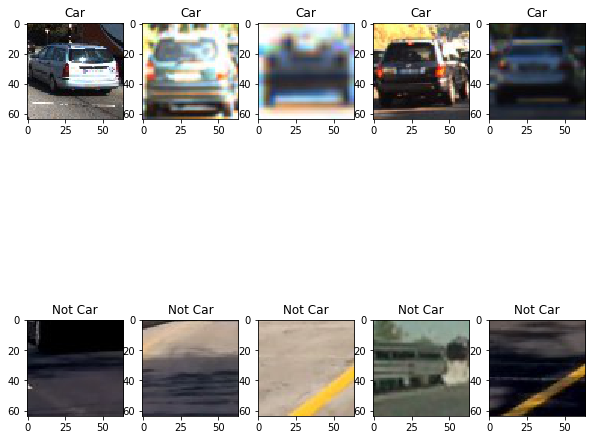

In [3]:
#random example images of cars and not cars 
fig, axs = plt.subplots(2, 5, figsize=(10, 10))
axs.ravel()

for i in range(5):
    random_ind = random.randint(0, len(notcar_imgs))
    random_car1 = car_imgs[random_ind]
    random_not_car1 = notcar_imgs[random_ind]
    
    axs[0, i].set_title('Car')
    axs[0, i].imshow(random_car1)
    axs[1, i].set_title('Not Car')
    axs[1, i].imshow(random_not_car1)
    
plt.show()

In [4]:
from skimage.feature import hog 

#get hog features with or without output image
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis, feature_vec):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                 cells_per_block=(cell_per_block, cell_per_block), block_norm='L2-Hys',
                                 transform_sqrt=True, visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), 
                       cells_per_block=(cell_per_block, cell_per_block), block_norm='L2-Hys',
                       transform_sqrt=True, visualise=vis, feature_vector=feature_vec)
        return features
    
    
#compute binned color features
def bin_spatial(img, size):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))


#compute color histogram features
def color_hist(img, nbins):
    ch1_hist = np.histogram(img[:,:,0], bins = nbins)
    ch2_hist = np.histogram(img[:,:,1], bins = nbins)
    ch3_hist = np.histogram(img[:,:,2], bins = nbins)
    features = np.concatenate((ch1_hist[0], ch2_hist[0], ch3_hist[0]))
    return features

def cvt_cspace(img, color_space):
    if color_space == 'HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif color_space == 'LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif color_space == 'HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif color_space == 'YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif color_space == 'YCrCb':
        # ret = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
        ret = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        return ret
    elif color_space == 'RGB':
        return np.copy(img)
    
    raise ValueError("unknown error")

    
def extract_img_features(img, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, 
                         hist_bins, orient, hog_channel, pix_per_cell, cell_per_block, vis=False):
    img_features = []
    feature_img = cvt_cspace(img, cspace)
        
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_img, size=spatial_size)
        img_features.append(spatial_features)
        
    if hist_feat == True:
        hist_features = color_hist(feature_img, nbins=hist_bins)
        img_features.append(hist_features)
        
    if hog_feat == True:
        if hog_channel=='ALL':
            hog_features = []
            for channel in range(feature_img.shape[2]):
                hog_features.append(get_hog_features(feature_img[:,:,channel], orient, pix_per_cell, cell_per_block, 
                                 vis=False, feature_vec=True))
            img_features.extend(hog_features)
        else:
            if vis == True:
                hog_features, hog_img = get_hog_features(feature_img[:,:,hog_channel], orient, 
                                                pix_per_cell,cell_per_block, vis=True, feature_vec=True)
            else:
                hog_features = get_hog_features(feature_img[:,:,hog_channel], orient, pix_per_cell, 
                                               cell_per_block, vis=False, feature_vec=True)
            img_features.append(hog_features)
        
    if vis == True:
        return np.concatenate(img_features), hog_img
    else:
        return np.concatenate(img_features)

    
def extract_imgS_features(imgs, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, 
                          hist_bins, orient, hog_channel, pix_per_cell, cell_per_block):
    imgs_features = []
    for img in imgs:
        features = extract_img_features(img, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, hist_bins, 
                            orient, hog_channel, pix_per_cell, cell_per_block)
        imgs_features.append(features)
    return imgs_features
    
print('done')

done


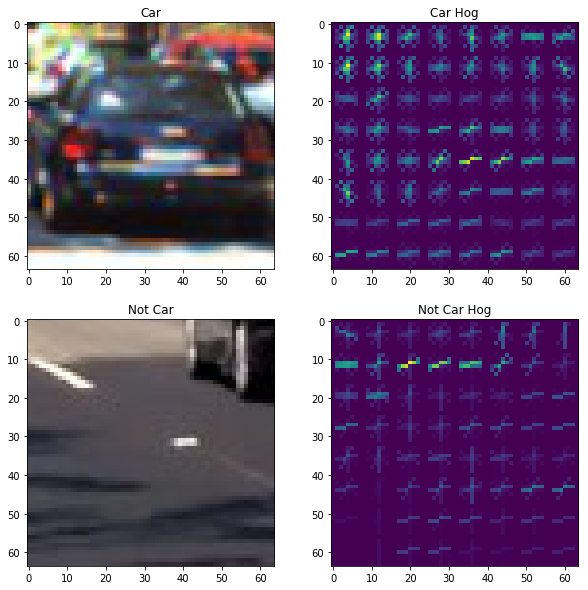

In [5]:
#visualize on smallset car and not car with or without features

random_ind = random.randint(0, len(notcar_imgs))
random_car2 = car_imgs[random_ind]
random_not_car2 = notcar_imgs[random_ind]

cspace ='YCrCb'
spatial_feat = True
hist_feat = True
hog_feat = True
spatial_size =(16, 16)
hist_bin = 16
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 2

_, car_hog = extract_img_features(random_car2, cspace, spatial_feat, hist_feat, hog_feat, spatial_size,
                                  hist_bin, orient, hog_channel, pix_per_cell, cell_per_block, vis=True)

_, not_car_hog = extract_img_features(random_not_car2, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, 
                                      hist_bin, orient, hog_channel, pix_per_cell, cell_per_block, vis=True)

fig, axs = plt.subplots(2, 2, figsize =(10, 10))

axs[0, 0].set_title('Car')
axs[0, 0].imshow(random_car2)

axs[0, 1].set_title('Car Hog')
axs[0, 1].imshow(car_hog)

axs[1, 0].set_title('Not Car')
axs[1, 0].imshow(random_not_car2)

axs[1, 1].set_title('Not Car Hog')
axs[1, 1].imshow(not_car_hog)


plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import time 
from sklearn.model_selection import train_test_split

#test on sample size of datas to see the performace 
sample_size = 2500
cars = vehicle_imgs
notcars = non_vehicle_imgs

cspace = 'YCrCb'
spatial_feat = True
hist_feat = True
hog_feat = True
spatial_size =(16, 16)
hist_bins = 16
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'

t = time.time()
car_features = extract_imgS_features(cars, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, 
                                     hist_bins, orient, hog_channel, pix_per_cell, cell_per_block)

notcar_features = extract_imgS_features(notcars, cspace, spatial_feat, hist_feat, hog_feat, spatial_size, 
                                        hist_bins, orient, hog_channel, pix_per_cell, cell_per_block)








t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract Hog features...')

X = np.vstack((car_features, notcar_features)).astype(np.float64)

X_scaler = StandardScaler().fit(X)
global X_scaler
scaled_X = X_scaler.transform(X)
print(X.shape)

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = rand_state)

svc = LinearSVC()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to training')
print('Test accuracy of SVC=', round(svc.score(X_test, y_test), 2))



t = time.time()
n_predict = 500
t2 = time.time()
print(round(t2-t, 4))

print('done')

183.49 Seconds to extract Hog features...
(17584, 6108)
208.57 Seconds to training
Test accuracy of SVC= 0.99
0.0001
done


In [ ]:
import pickle
the_model = {}
the_model['svc'] = svc
the_model['X_scaler'] = X_scaler
pickle.dump(the_model, open("the_model.p", "wb"))


In [26]:
import pickle


model_fetched  = pickle.load( open("the_model.p", "rb" ) )
svc = model_fetched['svc']
X_scaler = model_fetched['X_scaler']


cspace = 'YCrCb'
spatial_feat = True
hist_feat = True
hog_feat = True
spatial_size =(16, 16)
hist_bins = 16
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'

print('done')

done


In [14]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy


def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                 xy_window=(64, 64), xy_overlap=(0.5, 0.5)):

    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]

    nx_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    nx_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    ny_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    nx_windows = np.int((xspan - nx_buffer) / nx_pix_per_step)
    ny_windows = np.int((yspan - ny_buffer) / ny_pix_per_step)

    window_list = []

    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs * nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys * ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            window_list.append(((startx, starty), (endx, endy)))
    return window_list


def search_windows(img, windows, clf, scaler, color_space='YCrCb', spatial_size=(16, 16), hist_bins=16, orient=9,
                   pix_per_cell=8, cell_per_block=2, hog_channel=0, spatial_feat=True, hist_feat=True, hog_feat=True):

    on_windows = []
    for window in windows:
        # Extract the test window from original image
        window_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        features = extract_img_features(window_img, color_space, spatial_feat, hist_feat, hog_feat, spatial_size, hist_bins, orient,
                                        hog_channel, pix_per_cell, cell_per_block)
    
        test_features = scaler.transform(np.array(features).reshape(1, -1))
    
        prediction = clf.predict(test_features)


        if prediction == 1:
            on_windows.append(window)
        
    return on_windows

print('done')

done


In [10]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]]+=1
    return heatmap

    
def heatmap_threshold(heat, threshold):
    heat[heat <= threshold] = 0
    return heat


def draw_labeled_boxes(img, labels):
    for car_counts in range(1, labels[1]+1):
        nonzero = (labels[0] == car_counts).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        draw_box = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, draw_box[0], draw_box[1], (0, 255, 0), 6)
    return img 

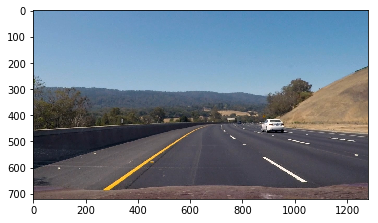

In [25]:



test1 = test_imgs[5]
test_image1 = test1.astype(np.float32)/255



windows = slide_window(test_image1, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(test_image1, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                      


window_img = draw_boxes(test1, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)
plt.show()

2
0


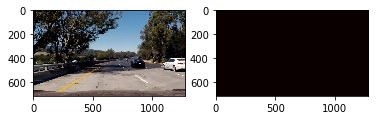

In [32]:

test_heat = test_imgs[0]
heat_zeros = np.zeros_like(test_heat[:,:,0]).astype(np.float)
box_list = hot_windows

heat = add_heat(heat_zeros, hot_windows)
heat_thresh = heatmap_threshold(heat, 1)

heatmap = np.clip(heat_thresh, 0, 255)
labels = label(heat_thresh)
print(len(labels))

print(len(hot_windows))
result_img = draw_labeled_boxes(np.copy(test_heat), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(result_img)
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.show()

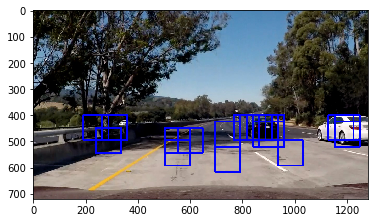

In [45]:
import random

    

def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins):
    
    copy_img = np.copy(img)
    
    img = img.astype(np.float32)/255
    target_img = img[ystart:ystop,:,:]
    cvt_target = cvt_cspace(target_img, 'YCrCb')
    window = 64
    cells_per_step = 2
    
    if scale != 1:
        imshape = cvt_target.shape
        cvt_target = cv2.resize(cvt_target, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = cvt_target[:,:,0]
    ch2 = cvt_target[:,:,1]
    ch3 = cvt_target[:,:,2]
    
    xblocks = (ch1.shape[1]//pix_per_cell)- 1
    yblocks = (ch1.shape[0]//pix_per_cell) - 1
    feats_per_block = orient*cell_per_block**2
    
    
    blocks_per_window = (window // pix_per_cell) -1
    xsteps = (xblocks - blocks_per_window) // cells_per_step
    ysteps = (yblocks - blocks_per_window) // cells_per_step
    
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, False, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, False, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, False, feature_vec=False)
    
    on_windows = []
    img_boxes = []
    for xblock in range(xsteps):
        for yblock in range(ysteps):
            ypos = yblock*cells_per_step
            xpos = xblock*cells_per_step
            
            hog_feat1 = hog1[ypos:ypos+blocks_per_window, xpos:xpos+blocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+blocks_per_window, xpos:xpos+blocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+blocks_per_window, xpos:xpos+blocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
        
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            
            subimg = cv2.resize(cvt_target[ytop:ytop+window, xleft:xleft+window], (64, 64))
            
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins = hist_bins)
            
            # debugging:
            #  3072,)
            #   (96,)
            # (5292,)
            # (1,8460)
            
            # (4000, 4932)

            #ValueError: operands could not be broadcast together with shapes (1,8460) (4932,) (1,8460) 

            stacked = np.hstack((spatial_features, hist_features, hog_features))
            # random.shuffle(stacked)
            test_features = X_scaler.transform(stacked.reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(copy_img, (xbox_left, ytop_draw+ystart), (xbox_left+win_draw, ytop_draw+win_draw+ystart),(0, 0, 255), 6)
                img_boxes.append(([xbox_left, ytop_draw+ystart], [xbox_left+win_draw, ytop_draw+win_draw+ystart]))
                
    return copy_img, img_boxes




ystart = 400
ystop = 656
scale = 1.5

out_img, imgboxes = find_cars(test_imgs[0], ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
plt.imshow(out_img)
plt.show()
  

In [46]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]]+=1
    return heatmap

    
def heatmap_threshold(heat, threshold):
    heat[heat <= threshold] = 0
    return heat


def draw_labeled_boxes(img, labels):
    for car_counts in range(1, labels[1]+1):
        nonzero = (labels[0] == car_counts).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        draw_box = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, draw_box[0], draw_box[1], (0, 255, 0), 6)
    return img 


2


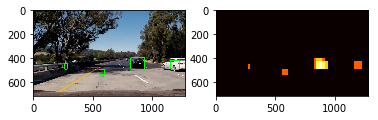

In [48]:
test_heat = test_imgs[0]
heat_zeros = np.zeros_like(test_heat[:,:,0]).astype(np.float)
box_list = imgboxes

heat = add_heat(heat_zeros, box_list)
heat_thresh = heatmap_threshold(heat, 2)

heatmap = np.clip(heat_thresh, 0, 255)
labels = label(heat_thresh)
print(len(labels))

result_img = draw_labeled_boxes(np.copy(test_heat), labels)
fig = plt.figure()
plt.subplot(121)
plt.imshow(result_img)
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.show()


In [183]:
def process_img(img):
    draw_img = np.copy(img)
    out_img, img_boxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins)
    heat = np.zeros_like(test_heat[:,:,0]).astype(np.float)
    bbox_list = img_boxes
    heat = add_heat(heat, bbox_list)
    heat_thresh = heatmap_threshold(heat, 5)
    heatmap = np.clip(heat_thresh, 0, 255)
    labels = label(heat_thresh)
    result_img = draw_labeled_boxes(draw_img, labels)
    return result_img

In [124]:
from IPython.display import HTML

output =  'v1.mp4'

from moviepy.editor import VideoFileClip
clip1 = VideoFileClip('./test_video.mp4')

In [186]:


    
# %time new_frames = [process_img(fr) for fr in clip1.iter_frames()]
print('processing')
# process_video
# process_img
new_clip = clip1.fl_image(process_img)

print('images done processing')
    
    
# new_clip = ImageSequenceClip(new_frames, fps=cli/p1.fps)
%time new_clip.write_videofile(output, audio=False)
    

HTML("""
<video width="960" height="540" controls>
  <source src='{0}'>
</video>
""".format(output))

processing
scale 2.5
images done processing
[MoviePy] >>>> Building video v1.mp4
[MoviePy] Writing video v1.mp4


  3%|▎         | 1/39 [00:01<01:10,  1.85s/it]

scale 2.5


  5%|▌         | 2/39 [00:03<01:08,  1.84s/it]

scale 2.5


  8%|▊         | 3/39 [00:05<01:06,  1.84s/it]

scale 2.5


 10%|█         | 4/39 [00:07<01:04,  1.84s/it]

scale 2.5


 13%|█▎        | 5/39 [00:09<01:02,  1.84s/it]

scale 2.5


 15%|█▌        | 6/39 [00:11<01:00,  1.85s/it]

scale 2.5


 18%|█▊        | 7/39 [00:12<00:59,  1.85s/it]

scale 2.5


 21%|██        | 8/39 [00:14<00:57,  1.85s/it]

scale 2.5


 23%|██▎       | 9/39 [00:16<00:55,  1.84s/it]

scale 2.5


 26%|██▌       | 10/39 [00:18<00:53,  1.84s/it]

scale 2.5


 28%|██▊       | 11/39 [00:20<00:51,  1.85s/it]

scale 2.5


 31%|███       | 12/39 [00:22<00:49,  1.84s/it]

scale 2.5


 33%|███▎      | 13/39 [00:23<00:47,  1.84s/it]

scale 2.5


 36%|███▌      | 14/39 [00:25<00:45,  1.84s/it]

scale 2.5


 38%|███▊      | 15/39 [00:27<00:43,  1.83s/it]

scale 2.5


 41%|████      | 16/39 [00:29<00:42,  1.84s/it]

scale 2.5


 44%|████▎     | 17/39 [00:31<00:40,  1.85s/it]

scale 2.5


 46%|████▌     | 18/39 [00:33<00:38,  1.84s/it]

scale 2.5


 49%|████▊     | 19/39 [00:34<00:36,  1.84s/it]

scale 2.5


 51%|█████▏    | 20/39 [00:36<00:35,  1.84s/it]

scale 2.5


 54%|█████▍    | 21/39 [00:38<00:33,  1.84s/it]

scale 2.5


 56%|█████▋    | 22/39 [00:40<00:31,  1.83s/it]

scale 2.5


 59%|█████▉    | 23/39 [00:42<00:29,  1.84s/it]

scale 2.5


 62%|██████▏   | 24/39 [00:44<00:27,  1.85s/it]

scale 2.5


 64%|██████▍   | 25/39 [00:46<00:25,  1.84s/it]

scale 2.5


 67%|██████▋   | 26/39 [00:47<00:23,  1.84s/it]

scale 2.5


 69%|██████▉   | 27/39 [00:49<00:21,  1.83s/it]

scale 2.5


 72%|███████▏  | 28/39 [00:51<00:20,  1.84s/it]

scale 2.5


 74%|███████▍  | 29/39 [00:53<00:18,  1.84s/it]

scale 2.5


 77%|███████▋  | 30/39 [00:55<00:16,  1.84s/it]

scale 2.5


 79%|███████▉  | 31/39 [00:57<00:14,  1.84s/it]

scale 2.5


 82%|████████▏ | 32/39 [00:58<00:12,  1.84s/it]

scale 2.5


 85%|████████▍ | 33/39 [01:00<00:11,  1.84s/it]

scale 2.5


 87%|████████▋ | 34/39 [01:02<00:09,  1.85s/it]

scale 2.5


 90%|████████▉ | 35/39 [01:04<00:07,  1.85s/it]

scale 2.5


 92%|█████████▏| 36/39 [01:06<00:05,  1.85s/it]

scale 2.5


 95%|█████████▍| 37/39 [01:08<00:03,  1.85s/it]

scale 2.5


 97%|█████████▋| 38/39 [01:09<00:01,  1.85s/it]

scale 2.5


[MoviePy] Done.
[MoviePy] >>>> Video ready: v1.mp4 

CPU times: user 1min 10s, sys: 1.2 s, total: 1min 12s
Wall time: 1min 11s
